## The goal: explore coupling metrics between CAM6 and CLM5 from MOAR simulation. 
Author: Meg D. Fowler <br>
Date:   10 Aug 2020 <br><br>

In [1]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
#import pandas as pd

# Plotting utils 
import matplotlib.pyplot as plt 
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


## Read in data

In [2]:
# Set directories and file names 
dailyDir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'
middleName = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames   = ['hfls','hfss','mrso','mrsos','pr']

# Set time period portion of fileNames 
timeName_flx  = ['19500101-19591231','19600101-19691231','19700101-19791231','19800101-19891231', 
                 '19900101-19991231','20000101-20091231','20100101-20150101']
timeName_soil = ['19500101-19991231','20000101-20150101']


In [3]:
# Read in test file to get lat/lon 
fileName = dailyDir+varNames[0]+middleName+timeName_flx[0]+'.nc'
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [44]:
# Read in surface fluxes 

for iT in range(len(timeName_flx)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    lhFile = dailyDir+varNames[0]+middleName+timeName_flx[iT]+'.nc' # File name
    lhDF   = xr.open_dataset(lhFile,decode_times=True) 
    lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()

    # Sensible heat flux
    shFile = dailyDir+varNames[1]+middleName+timeName_flx[iT]+'.nc' # File name
    shDF   = xr.open_dataset(shFile,decode_times=True)
    shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

    if iT==0:
        lhflx_full = lhDF 
        shflx_full = shDF
    else: 
        lhflx_full = xr.concat([lhflx_full, lhDF], dim="time")
        shflx_full = xr.concat([shflx_full, shDF], dim="time")

    print('Done with ', timeName_flx[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # This is added back by InteractiveShellApp.init_path()
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


Done with  19500101-19591231
Done with  19600101-19691231
Done with  19700101-19791231
Done with  19800101-19891231
Done with  19900101-19991231
Done with  20000101-20091231
Done with  20100101-20150101


In [45]:
# Read in soil moisture

for iT in range(len(timeName_soil)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    soilFile = dailyDir+varNames[2]+middleName+timeName_soil[iT]+'.nc' # File name
    soilDF   = xr.open_dataset(soilFile,decode_times=True) 
    soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
    
    # Sensible heat flux
    soil10File = dailyDir+varNames[3]+middleName+timeName_soil[iT]+'.nc' # File name
    soil10DF   = xr.open_dataset(soil10File,decode_times=True)
    soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()
    
    if iT==0:
        soilM_full   = soilDF 
        soilM10_full = soil10DF
    else: 
        soilM_full   = xr.concat([soilM_full, soilDF], dim="time")
        soilM10_full = xr.concat([soilM10_full, soil10DF], dim="time")

    print('Done with ', timeName_soil[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # This is added back by InteractiveShellApp.init_path()
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


Done with  19500101-19991231
Done with  20000101-20150101


**Quick test to make sure LHFLX looks reasonable**

Text(0.5, 1.0, 'LHFLX (time mean, 1950-2014)')

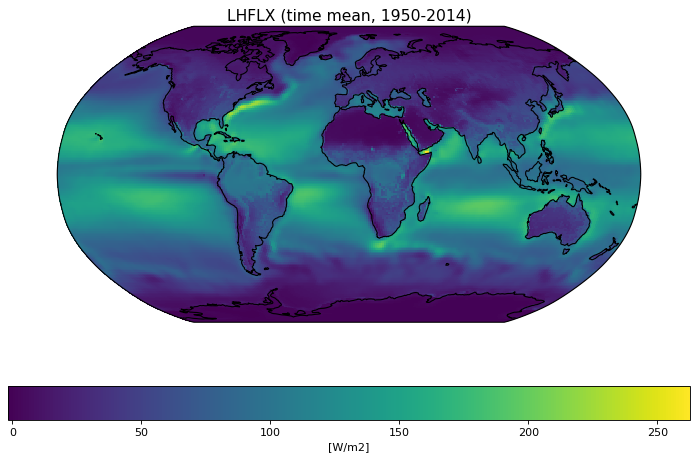

In [32]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
LHavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(lhflx_full.hfls,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,LHavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[W/m2]',orientation='horizontal')
ax.set_title('LHFLX (time mean, 1950-2014)', fontsize=14)


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


Text(0.5, 1.0, '10cm Soil Moisture (time mean, 1950-2014)')

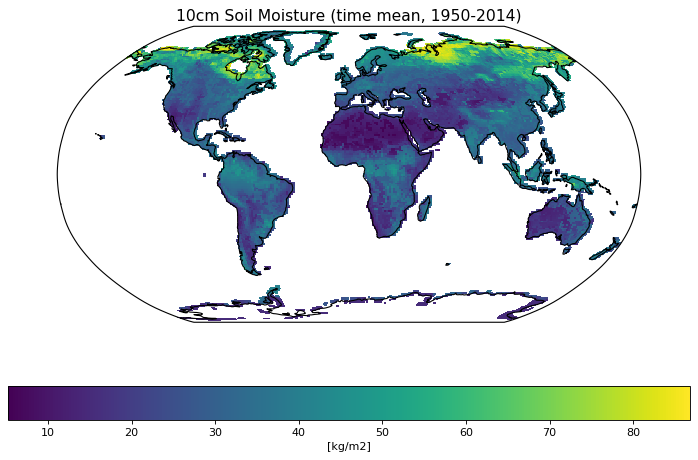

In [56]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
SMavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(soilM10_full.mrsos,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,SMavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('10cm Soil Moisture (time mean, 1950-2014)', fontsize=14)


## Coupling metrics

### Terrestrial coupling index

In [69]:
# Combine two variables into single dataset 
TS = lhflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_full['mrsos'])})


In [73]:
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(TS, xname='mrsos',yname='hfls',averaging='season')

/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [74]:
terra_coupling

<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    mrsos_hfls_CI  (season, lat, lon) float64 nan nan nan nan ... nan nan nan

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [DJF]')

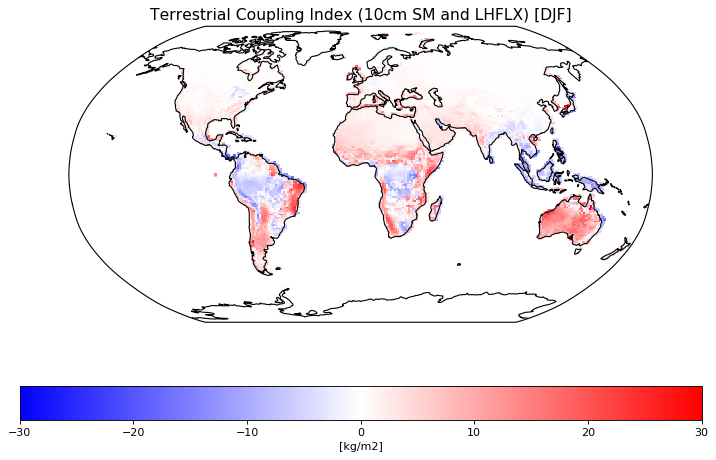

In [81]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)





Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [JJA]')

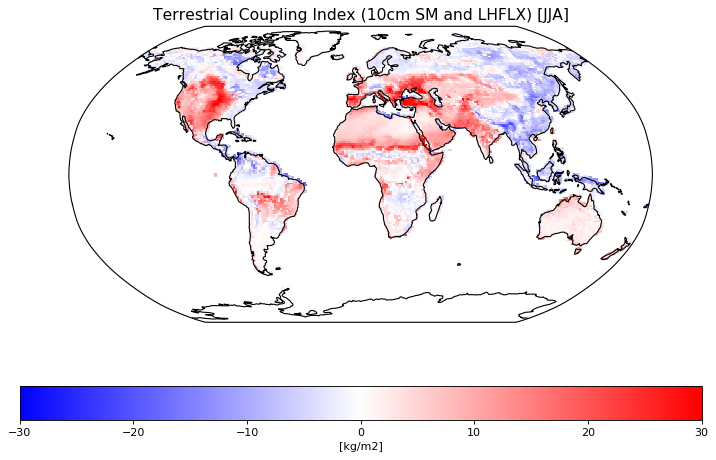

In [89]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[1]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [MAM]')

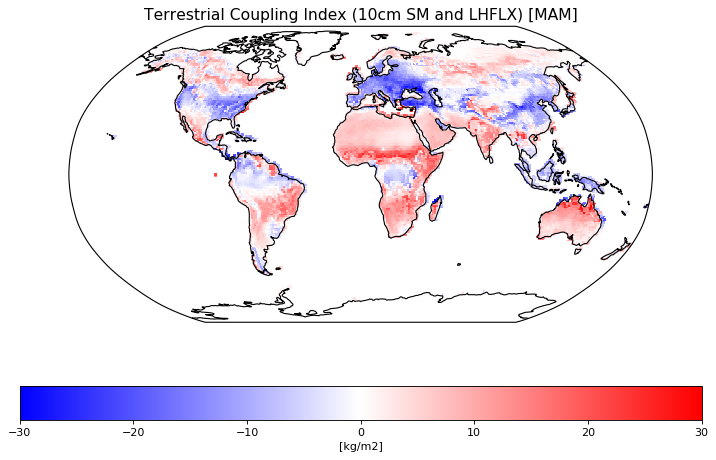

In [91]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_MAM, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[2,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_MAM,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[2]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [SON]')

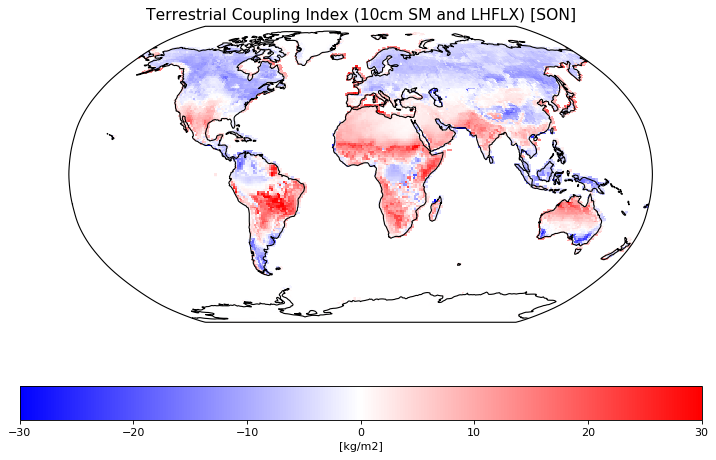

In [92]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_SON, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[3,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_SON,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[3]+']', fontsize=14)


In [14]:
print(cm.list_metrics)

['CouplingIndex', 'MixingDiagram', 'HeatCond', 'ConvTrig', 'RHTend', 'SoilMemory']


## Testing section
